In [1]:
import os
import glob
from matplotlib import pyplot as plt

In [2]:
data = {}

for filename in glob.glob("./power_sim/power_report-*.log"):
    test, _ = os.path.splitext(filename.split("/")[-1])
    test = test.split("-")[-1]
    with open(filename) as f:
        data[test] = f.readlines()

In [3]:
def find_line(file_content: [str], pattern: str) -> str:
    for line in file_content:
        if pattern in line:
            return line
    return ""

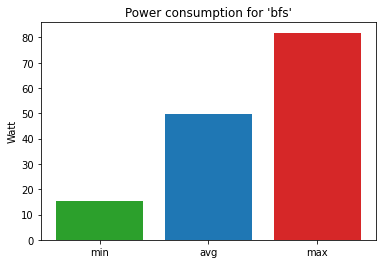

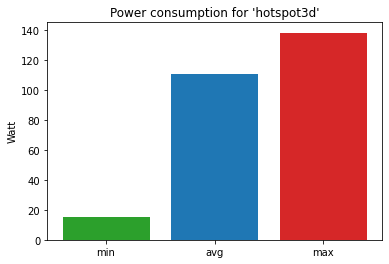

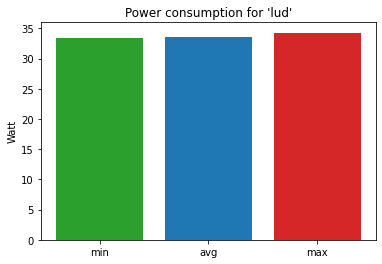

In [4]:
DPI=128

# Power consumption
for test in data.keys():
    max_cons = float(find_line(data[test], "gpu_tot_max_power").strip().split("=")[1])
    min_cons = float(find_line(data[test], "gpu_tot_min_power").strip().split("=")[1])
    avg_cons = float(find_line(data[test], "gpu_tot_avg_power").strip().split("=")[1])
    plt.bar(["min", "avg", "max"], [min_cons, avg_cons, max_cons], color=['tab:green', 'tab:blue', 'tab:red'])
    plt.ylabel("Watt")
    plt.title(f"Power consumption for '{test}'")
    plt.savefig(f"./plots/power_sim/{test}-power-min-avg-max.png", dpi=DPI)
    plt.show()

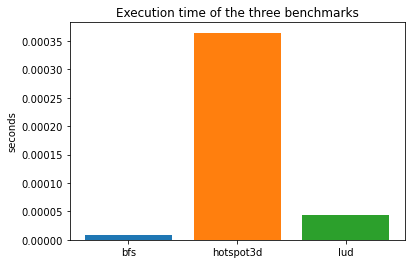

In [5]:
# Execution time
for test in data.keys():
    with open(f"./power_sim/{test}_stat.txt") as f:
        lines = f.readlines()
    
    clock_cycles = int(find_line(lines, "gpu_tot_sim_cycle").split("=")[1])
    core_freq = float(find_line(lines, "gpgpu_clock_domains").split()[1].split(":")[0]) * 1e6  # clock is in MHz
    execution_time = clock_cycles/core_freq
    plt.bar(test, execution_time)

plt.ylabel("seconds")
plt.title(f"Execution time of the three benchmarks")
plt.savefig(f"./plots/power_sim/execution_times.png", dpi=DPI)
plt.show()

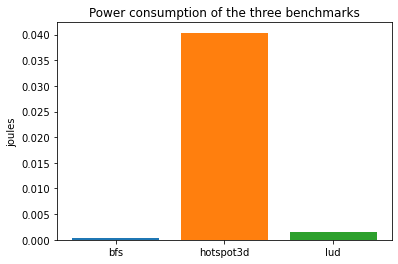

In [6]:
# Energy consumption

# No care for performances
for test in data.keys():
    with open(f"./power_sim/{test}_stat.txt") as f:
        lines = f.readlines()

    clock_cycles = int(find_line(lines, "gpu_tot_sim_cycle").split("=")[1])
    core_freq = float(find_line(lines, "gpgpu_clock_domains").split()[1].split(":")[0]) * 1e6  # clock is in MHz
    execution_time = clock_cycles/core_freq
    
    avg_cons = float(find_line(data[test], "gpu_tot_avg_power").strip().split("=")[1])
    joules = avg_cons * execution_time
    plt.bar(test, joules)

plt.ylabel("joules")
plt.title(f"Power consumption of the three benchmarks")
plt.savefig(f"./plots/power_sim/power_consumption.png", dpi=DPI)
plt.show()